# Cristiano Ronalde and Lionel Messi's Player Profile Analysis

## A) Observing the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import geopandas

In [2]:
# Source of data = https://www.kaggle.com/datasets/azminetoushikwasi/lionel-messi-vs-cristiano-ronaldo-club-goals
CRLM = pd.read_csv("../datasets/cristianovsmessi.csv")
raw_df = CRLM.copy()
raw_df.drop(["Matchday", "Result", "At_score"], axis= 1, inplace= True)
raw_df.head()

,Player,Season,Competition,Date,Venue,Club,Opponent,Playing_Position,Minute,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,2002-10-07,H,Sporting CP,Moreirense FC,LW,34,Solo run,NaN
1,Cristiano Ronaldo,02/03,Liga Portugal,2002-10-07,H,Sporting CP,Moreirense FC,LW,90+5,Header,Rui Jorge
2,Cristiano Ronaldo,02/03,Liga Portugal,2002-10-26,A,Sporting CP,Boavista FC,NaN,88,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,2002-11-24,H,Sporting CP,CD Estarreja,NaN,67,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,NaN,13,NaN,NaN


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Player            1413 non-null   object
 1   Season            1413 non-null   object
 2   Competition       1413 non-null   object
 3   Date              1413 non-null   object
 4   Venue             1413 non-null   object
 5   Club              1413 non-null   object
 6   Opponent          1413 non-null   object
 7   Playing_Position  1355 non-null   object
 8   Minute            1413 non-null   object
 9   Type              1397 non-null   object
 10  Goal_assist       953 non-null    object
dtypes: object(11)
memory usage: 121.6+ KB


In [4]:
# Data split for Cristiano Ronaldo(cr) and Lionel Messi(lm)
df_cr = raw_df[raw_df["Player"] == "Cristiano Ronaldo"]
df_lm = raw_df[raw_df["Player"] == "Lionel Messi"]


In [5]:
print("Cristiano Ronaldo's Goals Number: ", df_cr.groupby("Player")["Player"].count().sum()) 
print("Lionel Messi's Goals Number: ", df_lm.groupby("Player")["Player"].count().sum())


Cristiano Ronaldo's Goals Number:  710
Lionel Messi's Goals Number:  703


In [6]:
#Controling of NaN values for players and filling the NaN areas
print(df_cr.isnull().sum())
print(df_lm.isnull().sum())


Player                0
Season                0
Competition           0
Date                  0
Venue                 0
Club                  0
Opponent              0
Playing_Position     58
Minute                0
Type                 15
Goal_assist         246
dtype: int64
Player                0
Season                0
Competition           0
Date                  0
Venue                 0
Club                  0
Opponent              0
Playing_Position      0
Minute                0
Type                  1
Goal_assist         214
dtype: int64


In [7]:
# Filling the missing values in Playing Position with the value above 
df_cr["Playing_Position"].ffill(inplace= True)
# If there is no player assisting, the player scored the goal himself. For this reason, the missing values in the "Goal_Asisst" column have been filled with the players' own flow.
df_cr["Goal_assist"].fillna("Cristiano Ronaldo", inplace= True)
df_lm["Goal_assist"].fillna("Lionel Messi", inplace= True)

/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/2954283877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr["Playing_Position"].ffill(inplace= True)
/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/2954283877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr["Goal_assist"].fillna("Cristiano Ronaldo", inplace= True)
/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/2954283877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [8]:
# When missing data was observed, no correlation was observed between the missing data and other elements of the data set.
empty_rows_cr = df_cr[df_cr["Type"].isna()]
empty_rows_cr

,Player,Season,Competition,Date,Venue,Club,Opponent,Playing_Position,Minute,Type,Goal_assist
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,LW,13,NaN,Cristiano Ronaldo
12,Cristiano Ronaldo,04/05,FA Cup,2005-01-19,A,Manchester United,Exeter City,RW,9,NaN,Paul Scholes
38,Cristiano Ronaldo,05/06,EFL Cup,2006-02-26,H,Manchester United,Wigan Athletic,RW,59,NaN,Louis Saha
41,Cristiano Ronaldo,06/07,Premier League,2006-08-20,H,Manchester United,Fulham FC,RW,19,NaN,Wayne Rooney
44,Cristiano Ronaldo,06/07,Premier League,2006-09-23,A,Manchester United,Reading FC,CF,73,NaN,John OShea
47,Cristiano Ronaldo,06/07,Premier League,2006-10-28,A,Manchester United,Bolton Wanderers,CF,82,NaN,Louis Saha
49,Cristiano Ronaldo,06/07,Premier League,2006-11-29,H,Manchester United,Everton FC,RW,39,NaN,Cristiano Ronaldo
50,Cristiano Ronaldo,06/07,Premier League,2006-12-09,H,Manchester United,Manchester City,RW,84,NaN,Cristiano Ronaldo
51,Cristiano Ronaldo,06/07,Premier League,2006-12-23,A,Manchester United,Aston Villa,RW,85,NaN,Gary Neville
52,Cristiano Ronaldo,06/07,Premier League,2006-12-23,A,Manchester United,Aston Villa,RW,58,NaN,Cristiano Ronaldo


In [9]:
empty_rows_lm = df_lm[df_lm["Type"].isna()]
empty_rows_lm

,Player,Season,Competition,Date,Venue,Club,Opponent,Playing_Position,Minute,Type,Goal_assist
78,Lionel Messi,06/07,LaLiga,2007-06-09,H,FC Barcelona,RCD Espanyol Barcelona,RW,43,NaN,Gianluca Zambrotta


In [10]:
df_cr["Competition"].unique()

array(['Liga Portugal', 'Taca de Portugal Placard', 'Premier League',
       'FA Cup', 'UEFA Champions League Qualifying', 'EFL Cup',
       'UEFA Champions League', 'FIFA Club World Cup', 'LaLiga',
       'Copa del Rey', 'Supercopa', 'UEFA Super Cup', 'Serie A',
       'Supercoppa Italiana', 'Italy Cup', 'Europa League',
       'Saudi Pro League'], dtype=object)

In [11]:
df_lm["Competition"].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Troph�e des Champions', 'Trophée des Champions',
       'Champions League'], dtype=object)

In [12]:
df_cr["Competition"].replace("UEFA Champions League Qualifying", "UEFA Champions League", inplace= True)
df_cr["Goal_assist"].replace("\t", "Cristiano Ronald0", inplace= True)
df_lm["Goal_assist"].replace("\t", "Lionel Messi", inplace= True)
df_lm["Competition"].replace("Champions League", "UEFA Champions League", inplace= True)
df_lm["Competition"].replace("Troph�e des Champions", "Trophée des Champions", inplace= True)

/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/535124830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr["Competition"].replace("UEFA Champions League Qualifying", "UEFA Champions League", inplace= True)
/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/535124830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr["Goal_assist"].replace("\t", "Cristiano Ronald0", inplace= True)
/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/535124830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

In [13]:
df_cr["Competition"].unique()

array(['Liga Portugal', 'Taca de Portugal Placard', 'Premier League',
       'FA Cup', 'UEFA Champions League', 'EFL Cup',
       'FIFA Club World Cup', 'LaLiga', 'Copa del Rey', 'Supercopa',
       'UEFA Super Cup', 'Serie A', 'Supercoppa Italiana', 'Italy Cup',
       'Europa League', 'Saudi Pro League'], dtype=object)

In [14]:
df_lm["Competition"].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1',
       'Trophée des Champions'], dtype=object)

In [15]:
df_cr["Season"].replace("Dec-13", "12/13", inplace= True)
df_lm["Season"].replace("11-Dec", "11/12", inplace= True)
df_lm["Season"].replace("Dec-13", "12/13", inplace= True)

/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/2818906399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr["Season"].replace("Dec-13", "12/13", inplace= True)
/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/2818906399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lm["Season"].replace("11-Dec", "11/12", inplace= True)
/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/2818906399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [16]:
df_cr.head()

,Player,Season,Competition,Date,Venue,Club,Opponent,Playing_Position,Minute,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,2002-10-07,H,Sporting CP,Moreirense FC,LW,34,Solo run,Cristiano Ronaldo
1,Cristiano Ronaldo,02/03,Liga Portugal,2002-10-07,H,Sporting CP,Moreirense FC,LW,90+5,Header,Rui Jorge
2,Cristiano Ronaldo,02/03,Liga Portugal,2002-10-26,A,Sporting CP,Boavista FC,LW,88,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,2002-11-24,H,Sporting CP,CD Estarreja,LW,67,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,LW,13,NaN,Cristiano Ronaldo


In [17]:
df_lm.head()

,Player,Season,Competition,Date,Venue,Club,Opponent,Playing_Position,Minute,Type,Goal_assist
20,Lionel Messi,04/05,LaLiga,2005-05-01,H,FC Barcelona,Albacete Balompie,CF,90+1,Left-footed shot,Ronaldinho Gaacho
23,Lionel Messi,05/06,UEFA Champions League,2005-11-02,H,FC Barcelona,Panathinaikos Athens,RW,34,Left-footed shot,Lionel Messi
24,Lionel Messi,05/06,LaLiga,2005-11-27,H,FC Barcelona,Racing Santander,RW,51,Left-footed shot,Samuel Etoo
28,Lionel Messi,05/06,LaLiga,2006-01-15,H,FC Barcelona,Athletic Bilbao,RW,50,Left-footed shot,Mark van Bommel
29,Lionel Messi,05/06,LaLiga,2006-01-22,H,FC Barcelona,Deportivo Alaves,CF,82,Left-footed shot,Ronaldinho Gaacho


### Goals of Players According to Comptition

In [18]:
# I've defined the functions thats i will use mostly
def grouping(df,x,y):
    result = df.groupby(x)[y].count()
    result_df = pd.DataFrame({"Competition": result.index, "Count": result.values})
    return result_df

def custom_histplot(data, x_col, hue_col, title, palette=None):
    sns.histplot(data=data, x=x_col, hue=hue_col, stat="frequency", palette=palette)
    fig = plt.gcf()
    fig.set_size_inches(15,6)
    plt.title(title)
    plt.show()
custom_palette = ["#FF5733", "#33FF57", "#3366FF", "#FF33C6"]


In [19]:
grouping(df_cr, "Competition", "Season")

,Competition,Count
0,Copa del Rey,22
1,EFL Cup,4
2,Europa League,2
3,FA Cup,13
4,FIFA Club World Cup,7
5,Italy Cup,4
6,LaLiga,311
7,Liga Portugal,3
8,Premier League,103
9,Saudi Pro League,9


In [20]:
grouping(df_lm, "Competition", "Season")

,Competition,Count
0,Copa del Rey,56
1,FIFA Club World Cup,5
2,LaLiga,474
3,Ligue 1,20
4,Supercopa,14
5,Trophée des Champions,2
6,UEFA Champions League,129
7,UEFA Super Cup,3


/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/3082736905.py:8: UserWarning: 
The palette list has fewer values (4) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=data, x=x_col, hue=hue_col, stat="frequency", palette=palette)


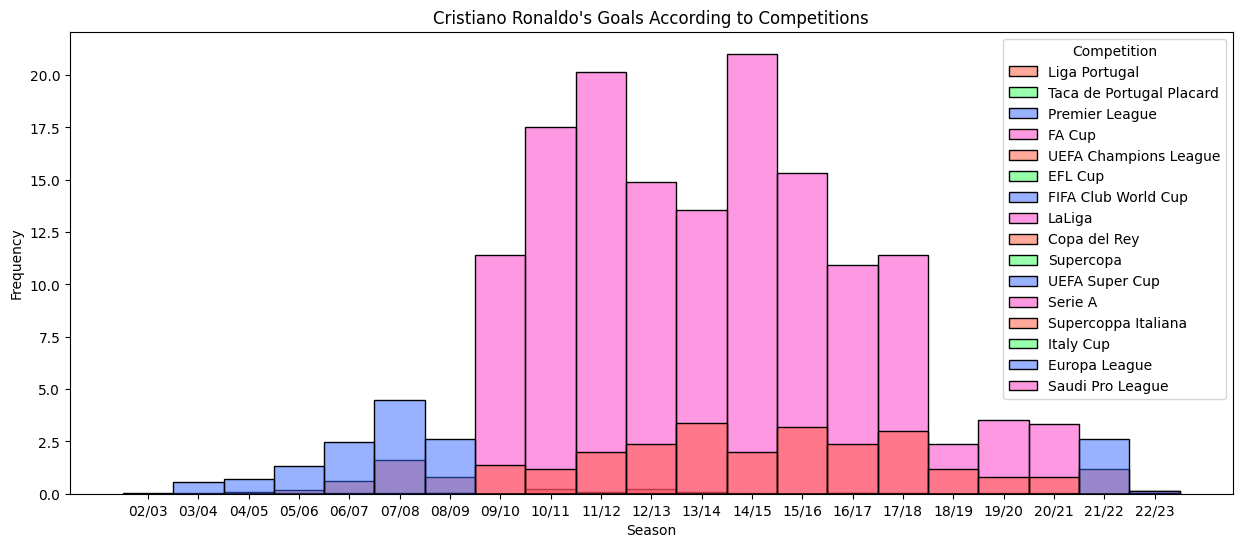

In [21]:
custom_histplot(df_cr, "Season", "Competition", "Cristiano Ronaldo's Goals According to Competitions", custom_palette)

/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/3082736905.py:8: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=data, x=x_col, hue=hue_col, stat="frequency", palette=palette)


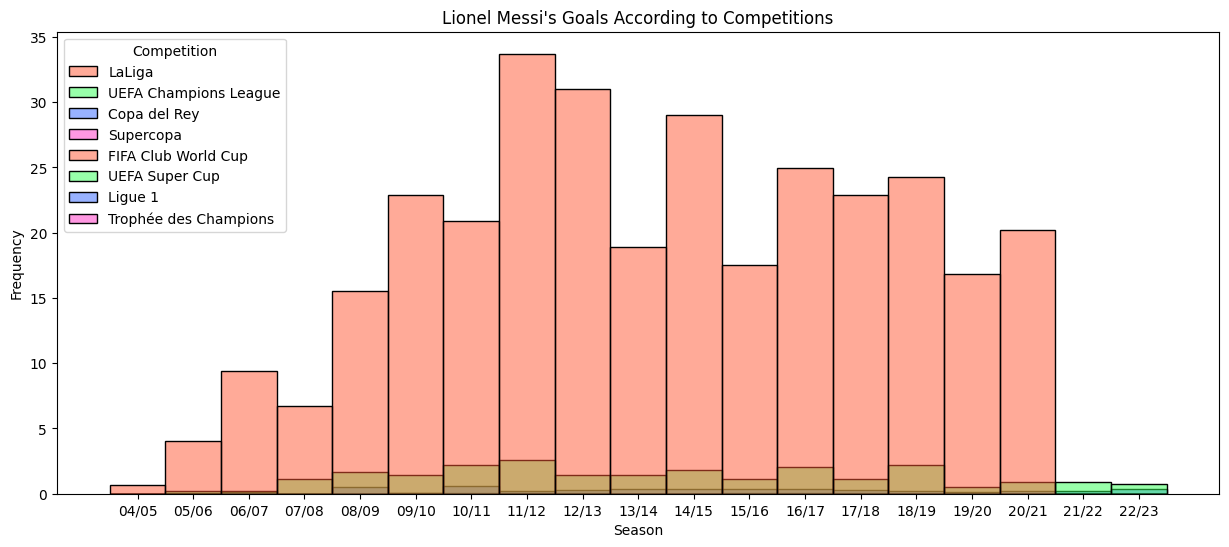

In [22]:
custom_histplot(df_lm, "Season", "Competition", "Lionel Messi's Goals According to Competitions", custom_palette)

### Goals of Players According to Home or Away

In [23]:
grouping(df_cr, "Venue", "Player")

,Competition,Count
0,A,306
1,H,404


In [24]:
grouping(df_lm, "Venue", "Player")

,Competition,Count
0,A,284
1,H,419


/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/3082736905.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(data=data, x=x_col, hue=hue_col, stat="frequency", palette=palette)


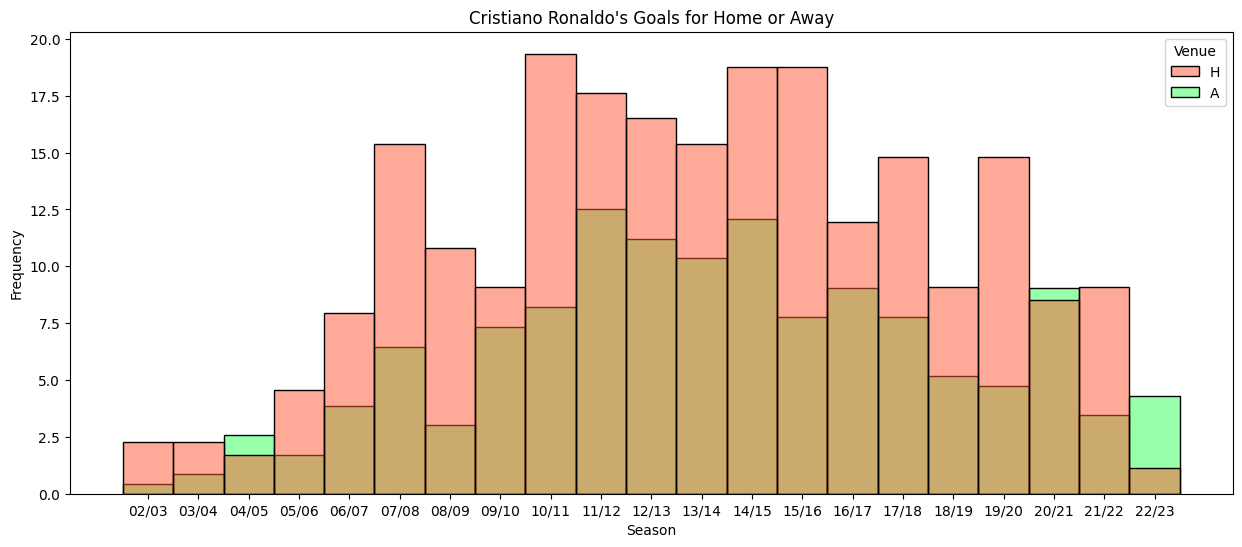

In [25]:
custom_histplot(df_cr, "Season", "Venue", "Cristiano Ronaldo's Goals for Home or Away", custom_palette)

/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/3082736905.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(data=data, x=x_col, hue=hue_col, stat="frequency", palette=palette)


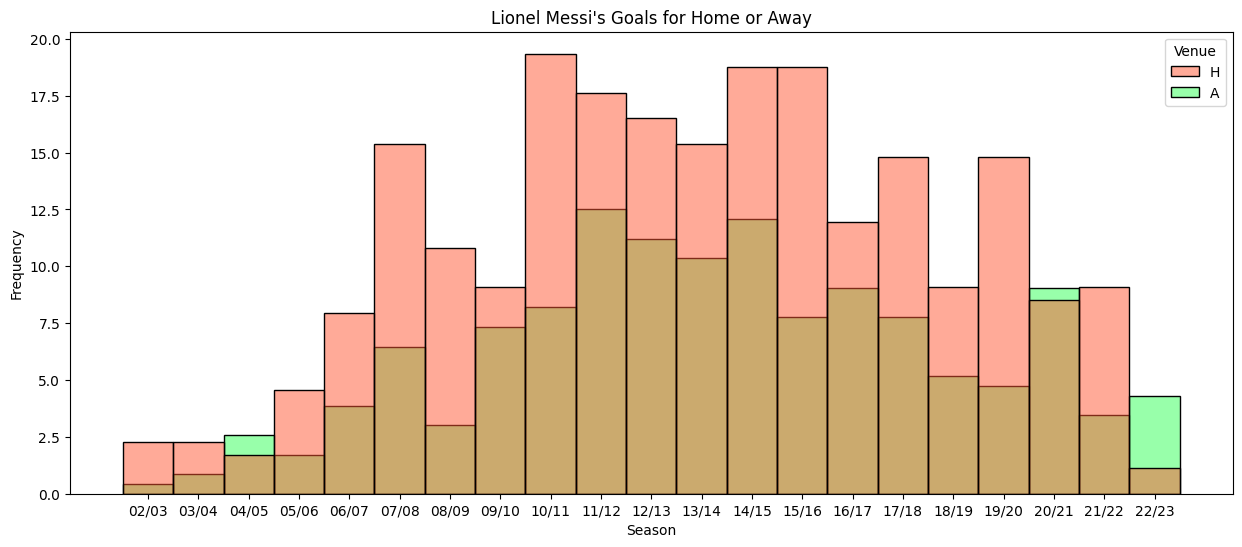

In [26]:
custom_histplot(df_cr, "Season", "Venue", "Lionel Messi's Goals for Home or Away", custom_palette)

### Players Goals for Which They Have Played

In [27]:
grouping(df_cr, "Club", "Season")

,Competition,Count
0,Al-Nassr FC,9
1,Juventus FC,101
2,Manchester United,145
3,Real Madrid,450
4,Sporting CP,5


In [28]:
grouping(df_lm, "Club", "Season")

,Competition,Count
0,FC Barcelona,672
1,Paris Saint-Germain,31


/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/3082736905.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(data=data, x=x_col, hue=hue_col, stat="frequency", palette=palette)


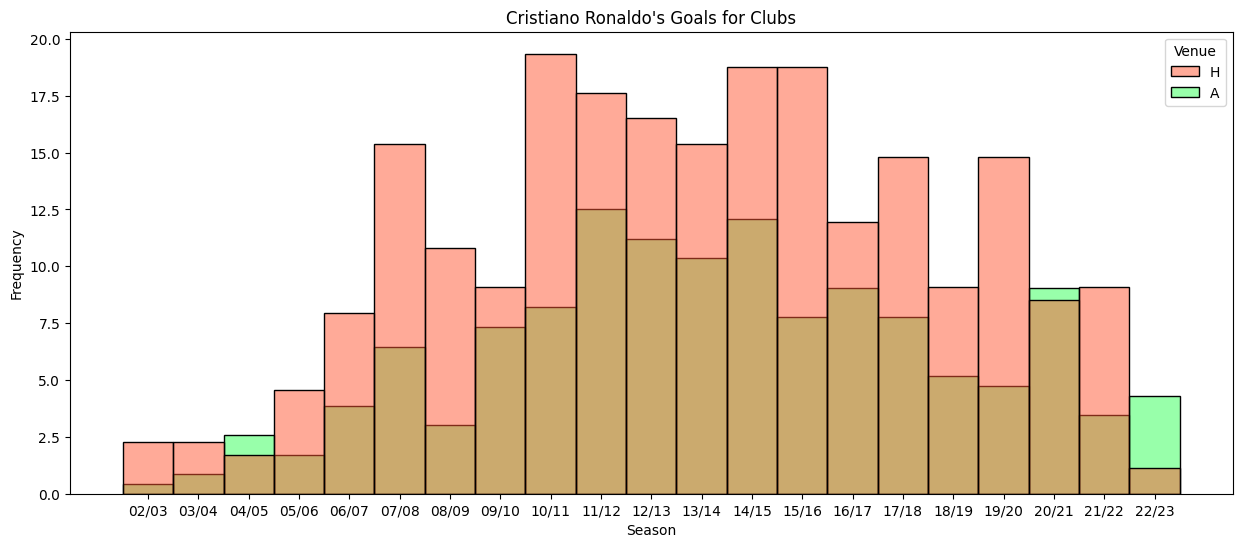

In [29]:
custom_histplot(df_cr, "Season", "Venue", "Cristiano Ronaldo's Goals for Clubs", custom_palette)

/var/folders/d8/86r_0j9x2wg7v3k_nljgnkc80000gn/T/ipykernel_96209/3082736905.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.histplot(data=data, x=x_col, hue=hue_col, stat="frequency", palette=palette)


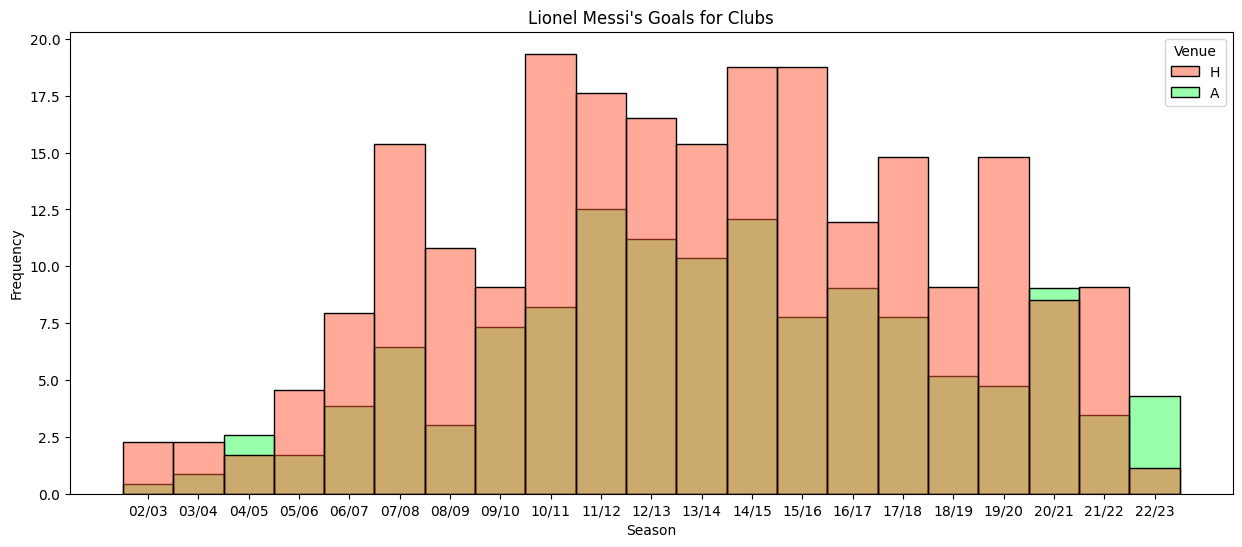

In [30]:
custom_histplot(df_cr, "Season", "Venue", "Lionel Messi's Goals for Clubs", custom_palette)

### Players Goals for Their Position

In [31]:
grouping(df_cr, "Playing_Position", "Season")

,Competition,Count
0,CF,221
1,CF,3
2,LW,362
3,LW,5
4,RW,119


In [32]:
grouping(df_lm, "Playing_Position", "Season")

,Competition,Count
0,AM,8
1,AM,7
2,CF,276
3,CF,40
4,LW,1
5,RW,221
6,RW,95
7,SS,23
8,SS,32


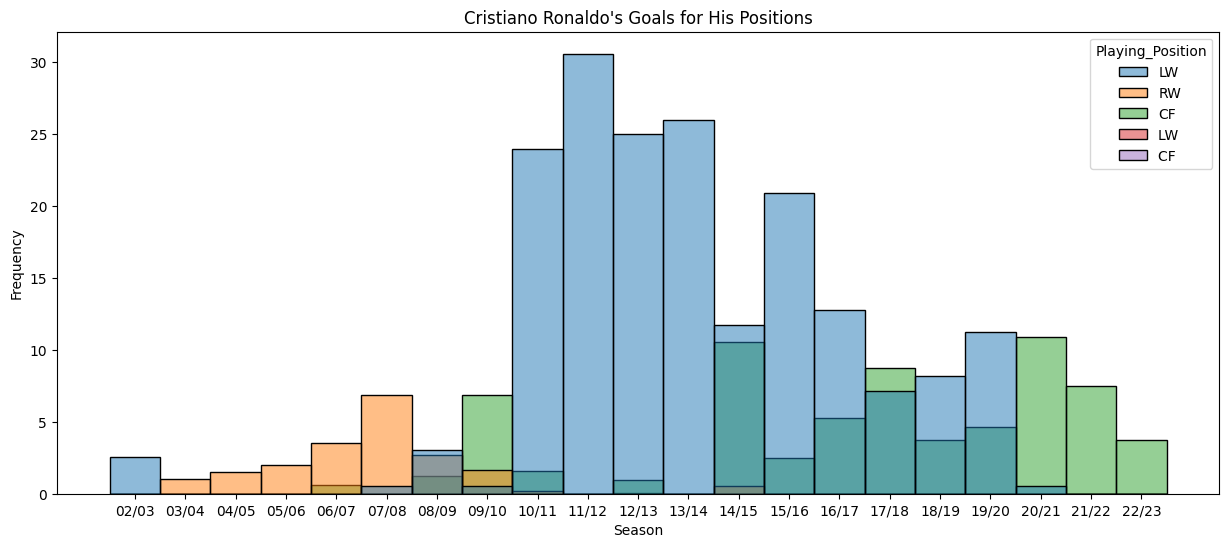

In [33]:
custom_histplot(df_cr, "Season", "Playing_Position", "Cristiano Ronaldo's Goals for His Positions")

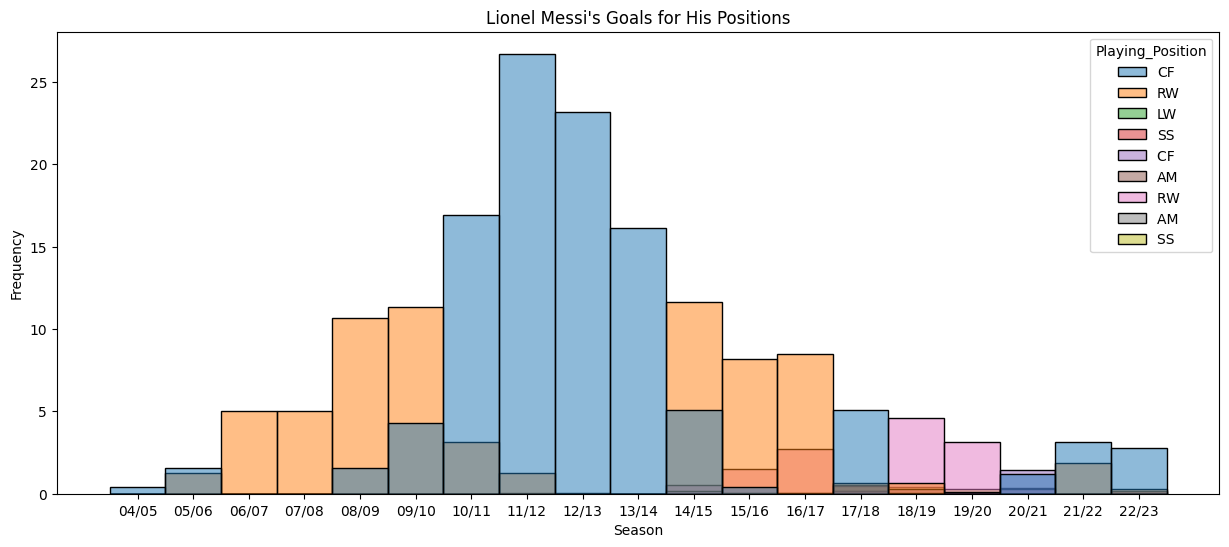

In [34]:
custom_histplot(df_lm, "Season", "Playing_Position", "Lionel Messi's Goals for His Positions")

### Players' Goals According to Their Opponents

In [35]:
grouping(df_cr, "Opponent", "Season")

,Competition,Count
0,AC Milan,6
1,ACF Fiorentina,3
2,AJ Auxerre,1
3,APOEL Nicosia,6
4,AS Roma,10
...,...,...
124,Watford FC,2
125,West Bromwich Albion,4
126,West Ham United,6
127,Wigan Athletic,7


In [36]:
grouping(df_lm, "Opponent", "Season")

,Competition,Count
0,AC Ajaccio,1
1,AC Milan,8
2,APOEL Nicosia,3
3,AS Roma,2
4,Ajax Amsterdam,6
...,...,...
92,UD Almera,13
93,UD Las Palmas,4
94,Valencia CF,31
95,VfB Stuttgart,3


### Analysis of how players score goals

In [37]:
grouping(df_cr, "Type", "Season")

,Competition,Count
0,Counter attack goal,6
1,Deflected shot on goal,2
2,Direct free kick,49
3,Header,112
4,Left-footed shot,113
5,Long distance kick,9
6,Penalty,132
7,Penalty rebound,3
8,Right-footed shot,253
9,Solo run,2


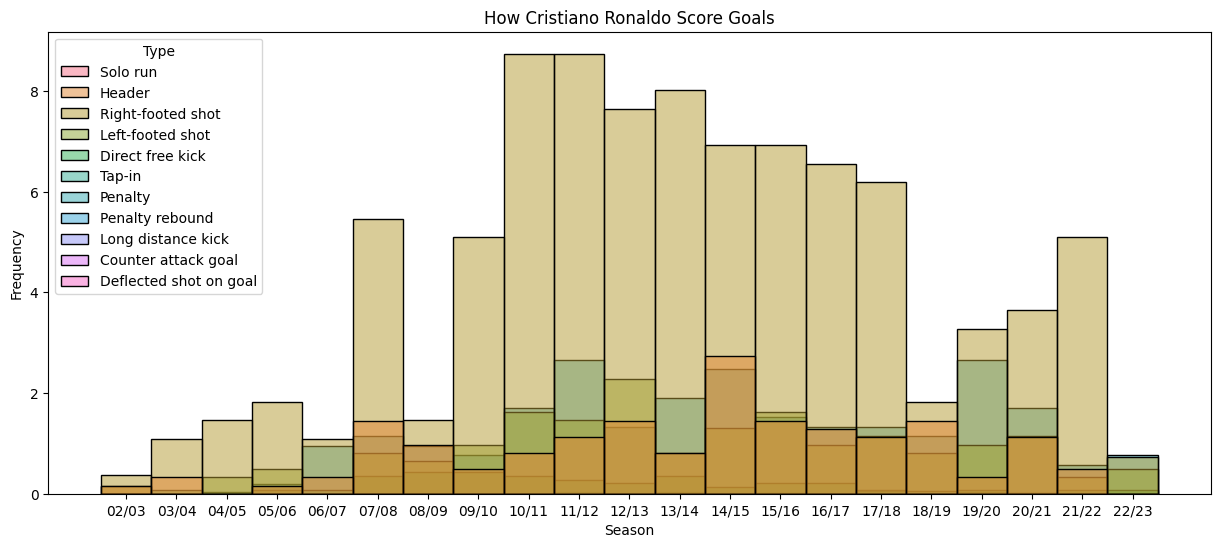

In [38]:
custom_histplot(df_cr, "Season", "Type", "How Cristiano Ronaldo Score Goals")

In [39]:
grouping(df_cr, "Type", "Season")

,Competition,Count
0,Counter attack goal,6
1,Deflected shot on goal,2
2,Direct free kick,49
3,Header,112
4,Left-footed shot,113
5,Long distance kick,9
6,Penalty,132
7,Penalty rebound,3
8,Right-footed shot,253
9,Solo run,2


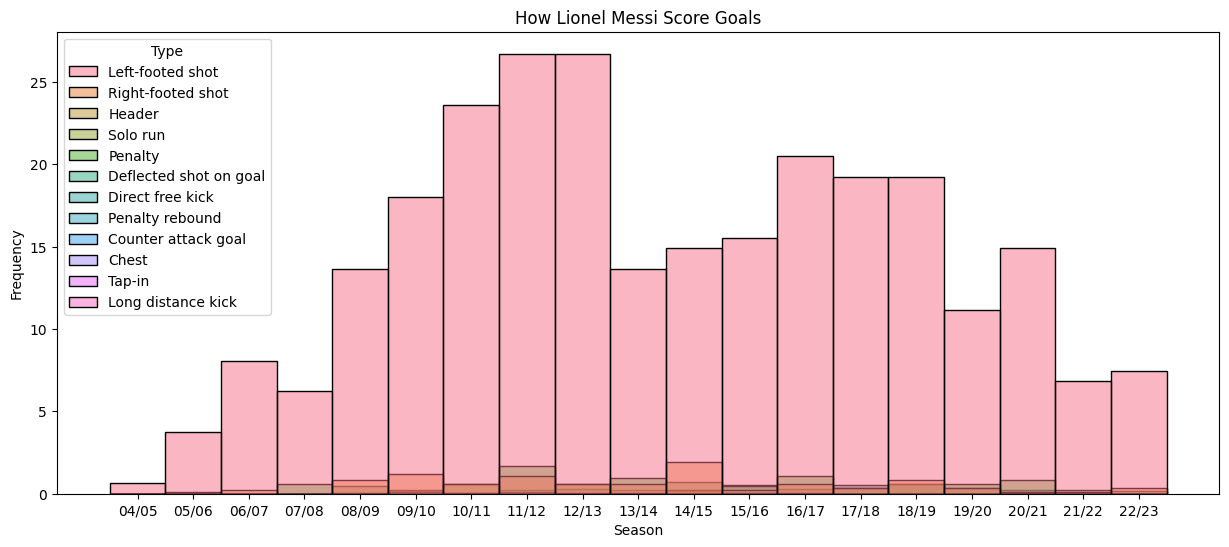

In [40]:
custom_histplot(df_lm, "Season", "Type", "How Lionel Messi Score Goals")

### Teammates Assisting Players

In [41]:
asisting_cr = grouping(df_cr, "Goal_assist", "Season")
sorted_asister_cr = asisting_cr.sort_values(by="Count", ascending=False)
sorted_asister_cr


,Competition,Count
18,Cristiano Ronaldo,246
47,Karim Benzema,44
31,Gareth Bale,29
62,Mesut Ozil,26
55,Marcelo,23
...,...,...
61,Merih Demiral,1
12,Carlos Martins,1
65,Nacho Fernandez,1
68,Nemanja Vidicâ€Ž,1


In [42]:
assisting_lm = grouping(df_lm, "Goal_assist", "Season")
sorted_asister_lm = assisting_lm.sort_values(by="Count", ascending= False)
sorted_asister_lm

,Competition,Count
35,Lionel Messi,215
38,Luis Suarez,48
16,Dani Alves,42
6,Andres Iniesta,39
66,Xavi,34
...,...,...
45,Munir El Haddadi,1
44,Maxwell,1
43,Martin Braithwaite,1
37,Ludovic Giuly,1


### Map of Player's Goals

In [43]:
## Selecting neccesary columns of dataset
opponent_clubs = raw_df[["Player", "Opponent"]]
opponent_clubs.columns = ['Player', 'Clubs']
opponent_clubs.head()

,Player,Clubs
0,Cristiano Ronaldo,Moreirense FC
1,Cristiano Ronaldo,Moreirense FC
2,Cristiano Ronaldo,Boavista FC
3,Cristiano Ronaldo,CD Estarreja
4,Cristiano Ronaldo,FC Oliveira do Hospital


In [44]:
## We need country infos of the football clubs, so i import other datasets
## Source of data = https://www.kaggle.com/datasets/ramjasmaurya/footballsoccer-clubs-ranking
country_infos = pd.read_csv("../datasets/Soccer_Football Clubs Ranking.csv")
country_infos.head()

,ranking,club name,country,point score,1 year change,previous point scored,symbol change
0,88,1. FC Köln,Germany,1633,105,1545,+
1,74,1. FC Union Berlin,Germany,1655,5,1654,+
2,780,12 de Octubre de Itaugua,Paraguay,1377,70,1388,-
3,268,1º de Agosto,Angola,1513,13,1516,-
4,2525,1º de Maio,Angola,1218,22,1218,-


In [45]:
## I need just "club name" and " country" columns
final_country_infos = country_infos[["club name ", "country"]]
final_country_infos.columns = ['Clubs', 'country']
final_country_infos.head()

,Clubs,country
0,1. FC Köln,Germany
1,1. FC Union Berlin,Germany
2,12 de Octubre de Itaugua,Paraguay
3,1º de Agosto,Angola
4,1º de Maio,Angola


In [46]:
# I need to marge two dataset
merged_goals = pd.merge(final_country_infos,opponent_clubs, on= "Clubs", how= "inner")
merged_goals.isnull().sum()
merged_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Clubs    453 non-null    object
 1   country  453 non-null    object
 2   Player   453 non-null    object
dtypes: object(3)
memory usage: 10.7+ KB


In [47]:
# Source of data = https://www.efrainmaps.es/english-version/free-downloads/europe/
world = geopandas.read_file("../datasets/Europe/Europe.shp")
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NAME       54 non-null     object  
 1   ORGN_NAME  54 non-null     object  
 2   geometry   54 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.4+ KB


<Axes: >

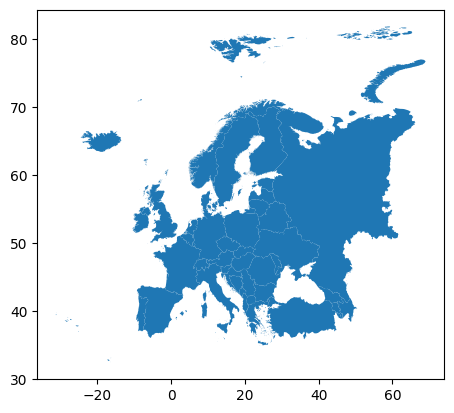

In [48]:
world.plot()

In [49]:
world.columns = ['country', 'ORGN_NAME', 'geometry']
world.drop("ORGN_NAME", axis= 1)

,country,geometry
0,Albania,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40..."
1,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ..."
2,Austria,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
3,Belgium,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
4,Bosnia Herzegovina,"POLYGON ((19.22947 43.53458, 19.22925 43.53597..."
5,Croatia,"MULTIPOLYGON (((14.30038 44.50156, 14.28972 44..."
6,Czech Republic,"POLYGON ((14.82523 50.87399, 14.83687 50.86996..."
7,Denmark,"MULTIPOLYGON (((11.99978 54.94118, 11.98534 54..."
8,Estonia,"MULTIPOLYGON (((23.97511 58.09691, 23.96645 58..."
9,Finland,"MULTIPOLYGON (((22.07310 60.22830, 22.06502 60..."


In [50]:
world_list = np.array(world["country"])
goals_list = np.array(merged_goals["country"])

In [51]:
for countries in goals_list:
    if countries in world_list:
        pass
    else:
        print(countries)

Saudi Arabia
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
Saudi Arabia
Saudi Arabia
Saudi Arabia
England
England
England
England
England
England
Japan
England
England
Japan
Japan
Japan
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
England
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Brazil
Brazil
Englan

In [52]:
world["country"].replace("United Kingdom", "England", inplace = True)

In [53]:
world_list = np.array(world["country"])
goals_list = np.array(merged_goals["country"])

In [54]:
for countries in goals_list:
    if countries in world_list:
        pass
    else:
        print(countries)

Saudi Arabia
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Cyprus
Saudi Arabia
Saudi Arabia
Saudi Arabia
Japan
Japan
Japan
Japan
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Honduras
Brazil
Brazil


In [55]:
merged_all_data = pd.merge(world, merged_goals, on= "country", how="inner")
final_data = geopandas.GeoDataFrame(merged_all_data)
final_data

,country,ORGN_NAME,geometry,Clubs,Player
0,France,France,"MULTIPOLYGON (((-2.28137 46.68570, -2.31121 46...",Clermont Foot,Lionel Messi
1,France,France,"MULTIPOLYGON (((-2.28137 46.68570, -2.31121 46...",Clermont Foot,Lionel Messi
2,France,France,"MULTIPOLYGON (((-2.28137 46.68570, -2.31121 46...",Clermont Foot,Lionel Messi
3,France,France,"MULTIPOLYGON (((-2.28137 46.68570, -2.31121 46...",Clermont Foot,Lionel Messi
4,France,France,"MULTIPOLYGON (((-2.28137 46.68570, -2.31121 46...",Montpellier,Lionel Messi
...,...,...,...,...,...
396,Ukraine,Ukrajina,"MULTIPOLYGON (((33.52988 45.87363, 33.52778 45...",Shakhtar Donetsk,Cristiano Ronaldo
397,Ukraine,Ukrajina,"MULTIPOLYGON (((33.52988 45.87363, 33.52778 45...",Shakhtar Donetsk,Cristiano Ronaldo
398,Ukraine,Ukrajina,"MULTIPOLYGON (((33.52988 45.87363, 33.52778 45...",Shakhtar Donetsk,Cristiano Ronaldo
399,Ukraine,Ukrajina,"MULTIPOLYGON (((33.52988 45.87363, 33.52778 45...",Shakhtar Donetsk,Cristiano Ronaldo


In [56]:
pivot_final_data = final_data.pivot_table(index = "country", columns= "Player", values= "Clubs", aggfunc="count")
pivot_final_data.fillna(0)
pivot_final_data

Player,Cristiano Ronaldo,Lionel Messi
country,,
Belarus,NaN,2.0
England,81.0,18.0
France,3.0,12.0
Germany,7.0,6.0
Italy,23.0,9.0
Moldova,2.0,NaN
Netherlands,9.0,10.0
Portugal,1.0,1.0
Spain,62.0,134.0


Text(0.5, 1.0, "Map of Player's Goals")

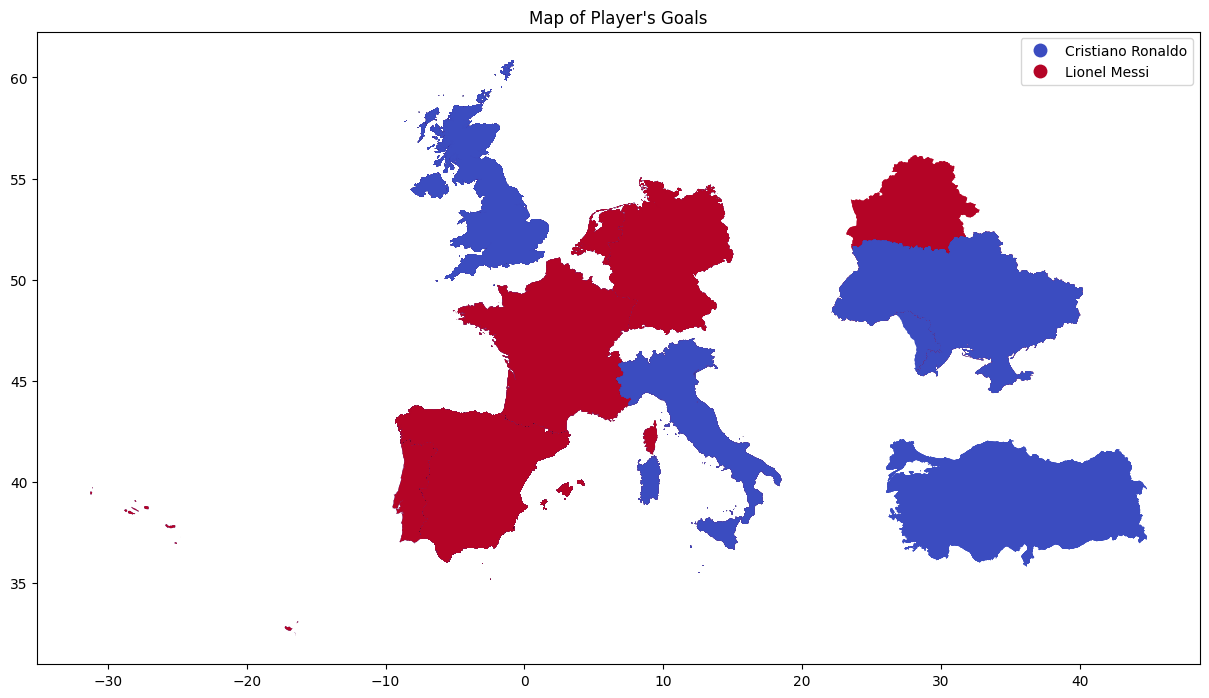

In [57]:
ax = final_data.plot(figsize=(15, 15), column= "Player", legend=True, missing_kwds = {'color': 'gray', 'label': 'Missing'},  cmap="coolwarm")
ax.set_title("Map of Player's Goals")